
<center>

****
 <div class="markdown-google-sans">
    <h1><b>Análisis de Imágenes Rayos X Cerebrales Usando Redes Neuronales Convencionales VGGNet</b></h1>
 </div>

****

 <div   >
    <h5>Edgar Daniel Basurto, Edwin Rafael Larrea</h5>
    <h5>Universidad de Guayaquil</h5>
    <h5>Facultad de Ciencias Matemáticas y Físicas</h5>     
    <h5>Ingeniería de Software</h5>
    <h5>Ing.Darwin Patiño Perez Msc.</h5>
 </div>




# PREPARACIÓN DE LOS DATOS

Fuente de datos  https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset

## Montaje de directorio

A continuación se monta GoogleDrive.

In [1]:
import os
import requests
import zipfile

from google.colab import drive
from sklearn.model_selection import train_test_split

# Tamaño de las imágenes para VGGNet
img_width, img_height = 224, 224

In [2]:
#Montaje del repositorio, requiere autenticación de Google
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [3]:
# Ruta del directorio en Google Drive
repo_dir = '/content/drive/MyDrive/Paper_VVG_CNN/'

In [4]:
# Ejecutar si no existe en Google Drive

# Crea el directorio
def create_in_drive(dir):
  #Verifica si el directorio existe
  if not os.path.exists(dir):

    os.makedirs(dir)

In [7]:
# Crea el directorio
create_in_drive(repo_dir)

## Descarga de las imágenes
Se descarga el banco de imágenes a usar.

In [10]:
# Ejecutar si no existe en Google Drive

# Descarga de archivos
zip_url=[]
zip_url.append('https://github.com/Rafael1108/datasheet/raw/main/BrainTumorData/No_Brain_Tumor.zip')
zip_url.append('https://github.com/Rafael1108/datasheet/raw/main/BrainTumorData/Yes_Brain_Tumor.zip')
zip_url.append('https://github.com/Rafael1108/datasheet/raw/main/BrainTumorData/validate.zip')

for url in zip_url:
  response = requests.get(url)
  zip_content = response.content

  # Guarda el archivo ZIP en la ruta de Google Drive
  with open(f'{repo_dir}/tmp.zip', 'wb') as zip_file:
    zip_file.write(zip_content)

  # Extrae el contenido del archivo ZIP en el directorio especificado

  with zipfile.ZipFile(f'{repo_dir}/tmp.zip', 'r') as zip_ref:
    zip_ref.extractall(repo_dir)

  # Elimina el archivo ZIP después de extraer el contenido
  os.remove(f'{repo_dir}/tmp.zip')

print('Directorio descargado y extraído exitosamente.')

Directorio descargado y extraído exitosamente.


## Información de los directorios

**No_Brain_Tumor** => Directorio que contiene banco de imágenes de rayos x de pacientes que no tienen tumor cerebral.

**Yes_Brain_Tumor** => Directorio que contiene banco de imágenes de rayos x de pacientes que presentan tumor cerebral.

**validate** => Directorio que contiene banco de imágenes para evaluar el modelo, incluye archivo csv con detalle de las imágenes que si presentan tumor como las que no.

In [11]:
print("*******************************************************************")
for expression in os.listdir(repo_dir):
    print(expression, "| contiene =>\t", len(os.listdir(repo_dir + expression)), 'images')
print("*******************************************************************")

*******************************************************************
No_Brain_Tumor | contiene =>	 2057 images
Yes_Brain_Tumor | contiene =>	 2485 images
validate | contiene =>	 59 images
*******************************************************************


## Clasificación de datos

In [12]:
# Directorio de imágenes con tumor
yesBrainTumorDir = repo_dir+'Yes_Brain_Tumor/'

# Directorio de imágenes sin tumor
noBrainTumorDir = repo_dir+'No_Brain_Tumor/'

In [13]:
# Cargar las rutas de las imágenes con tumor
noBrainTumor_images = [os.path.join(noBrainTumorDir, img) for img in os.listdir(noBrainTumorDir)]

# Cargar las rutas de las imágenes sin tumor
yesBrainTumor_images = [os.path.join(yesBrainTumorDir, img) for img in os.listdir(yesBrainTumorDir)]

In [14]:
# Etiquetar las imágenes (0 para los que no tienen tumor y 1 para los que si tienen tumor)
noBrainTumor_labels = [0] * len(noBrainTumor_images)

yesBrainTumor_labels = [1] * len(yesBrainTumor_images)

In [15]:
# Unir el conjunto de imágenes
allBrainTumor_images = noBrainTumor_images + yesBrainTumor_images

# Unir el conjunto de etiquetas
allBrainTumor_labels = noBrainTumor_labels + yesBrainTumor_labels

In [16]:
print("*******************************************************************")
print(f"Total conjunto de imágenes: {len(allBrainTumor_images)}")
print(f"Total conjunto de etiquetas: {len(allBrainTumor_labels)}")
print("*******************************************************************")

*******************************************************************
Total conjunto de imágenes: 4542
Total conjunto de etiquetas: 4542
*******************************************************************


## Segmentación de los datos a usar

In [17]:
import collections

In [18]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
train_images, temp_images, train_labels, temp_labels = train_test_split(allBrainTumor_images, allBrainTumor_labels, test_size=0.5, random_state=42)
valid_images, test_images, valid_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

In [19]:

print("*******************************************************************")
print(f"Total de Imágenes: {len(allBrainTumor_images)}")
print(f"Entrenar: {len(train_images)} | {round(len(train_images)*100/len(allBrainTumor_images),2)} % => [yes tumor, {collections.Counter(train_labels)[1]}] [no tumor, {collections.Counter(train_labels)[0]}]")
print(f"Validar : {len(valid_images)} | {round(len(valid_images)*100/len(allBrainTumor_images),2)} % => [yes tumor, {collections.Counter(valid_labels)[1]}] [no tumor, {collections.Counter(valid_labels)[0]}]")
print(f"Pruebas : {len(test_images)} | {round(len(test_images)*100/len(allBrainTumor_images),2)} % => [yes tumor, {collections.Counter(test_labels)[1]}] [no tumor, {collections.Counter(test_labels)[0]}]")
print("*******************************************************************")

*******************************************************************
Total de Imágenes: 4542
Entrenar: 2271 | 50.0 % => [yes tumor, 1235] [no tumor, 1036]
Validar : 1135 | 24.99 % => [yes tumor, 621] [no tumor, 514]
Pruebas : 1136 | 25.01 % => [yes tumor, 629] [no tumor, 507]
*******************************************************************


# PREPROCESAMIENTO DE DATOS

## Normalizado de imágenes

VGGNet indica que se debe redimensionar las imágenes a un tamaño de entrada de (224, 224) y normalizar los valores de píxeles.

Para ello se procede a realizar el siguiente normalizado.

In [20]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [21]:
# Función para normalizado de imágenes para VGGNet
def normalized_img(image_paths):
  images = []
  i,ok_files,err_files=0,0,0
  it=len(image_paths)
  for path in image_paths:
    try:
      image = cv2.imread(path)
      image = cv2.resize(image, (img_width, img_height))
      images.append(image)
      ok_files=ok_files+1
    except Exception as e:
      err_files=err_files+1
    finally:
      i=i+1
      perc=int((i/it)*100)
      sys.stdout.write("\r {} de {} => {}%".format(i, it, perc))
      sys.stdout.flush()

  print("\n")
  print("***************************************************")
  print("                    Estadística                    ")
  print("***************************************************")
  print(f"{len(image_paths)} imágenes encontradas en el directorio")
  print(f"Imagenes procesadas: {ok_files}")
  print(f"Imagenes erróneas  : {err_files}")

  show_before_normalized_img(image_paths)
  show_after_normalized_img(images)
  plt.tight_layout()
  plt.show()
  return preprocess_input(np.array(images))

# Función para visualizar algunas imágenes antes del normalizado
def show_before_normalized_img(images):
  plt.figure(figsize=(15, 7))
  for i, path in enumerate(images[:4]):
    plt.subplot(2, 4, i+1)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title("Original")
    plt.axis("off")

# Función para visualizar algunas imágenes después del normalizado
def show_after_normalized_img(images):
  plt.figure(figsize=(15, 7))
  for i, image in enumerate(images[:4]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title("Preprocesada")
    plt.axis("off")

 2271 de 2271 => 100%

***************************************************
                    Estadística                    
***************************************************
2271 imágenes encontradas en el directorio
Imagenes procesadas: 2271
Imagenes erróneas  : 0


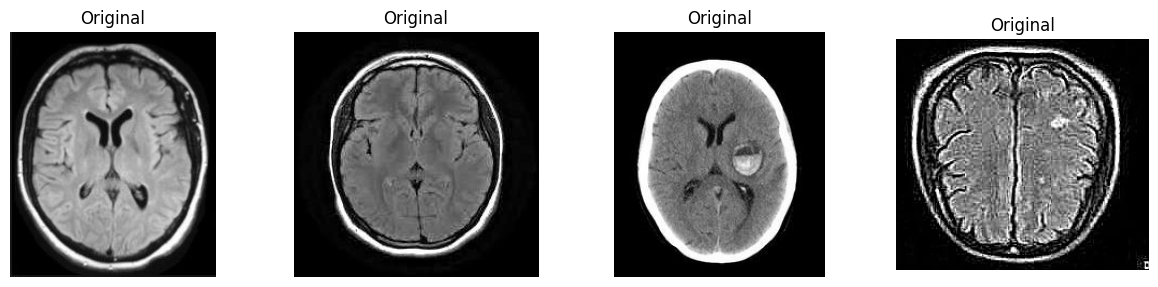

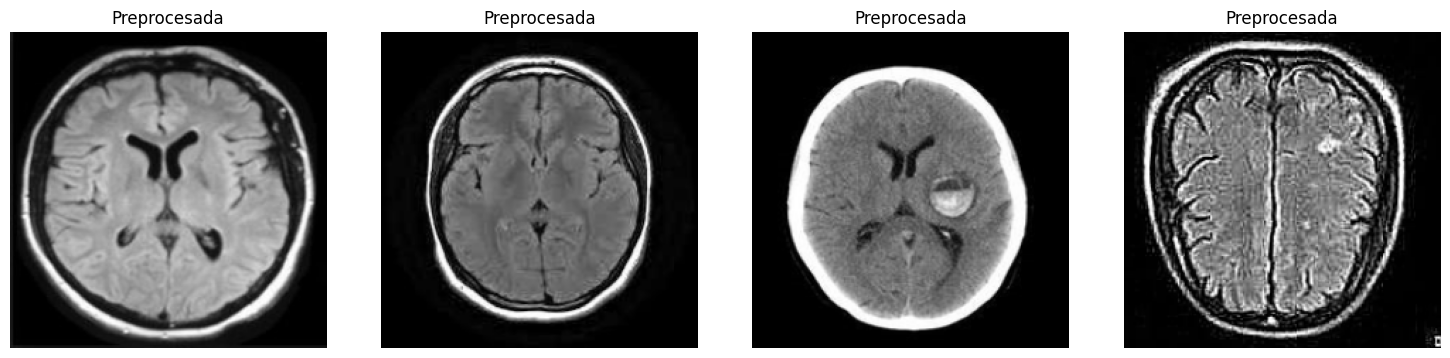

In [22]:
# Preprocesar las imágenes
train_data = normalized_img(train_images)

 1135 de 1135 => 100%

***************************************************
                    Estadística                    
***************************************************
1135 imágenes encontradas en el directorio
Imagenes procesadas: 1135
Imagenes erróneas  : 0


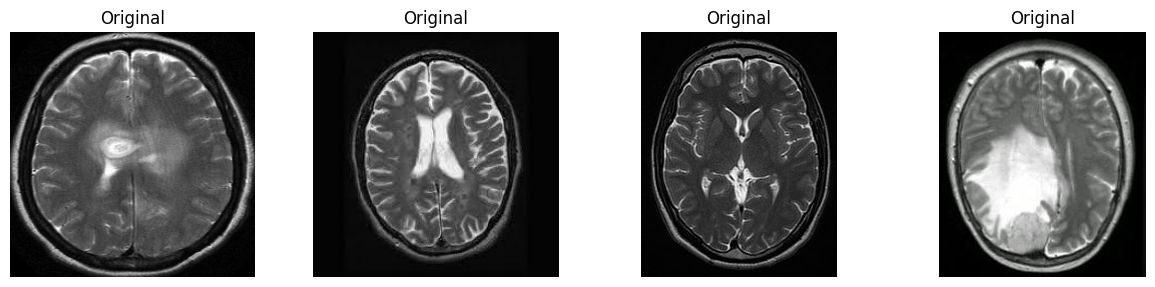

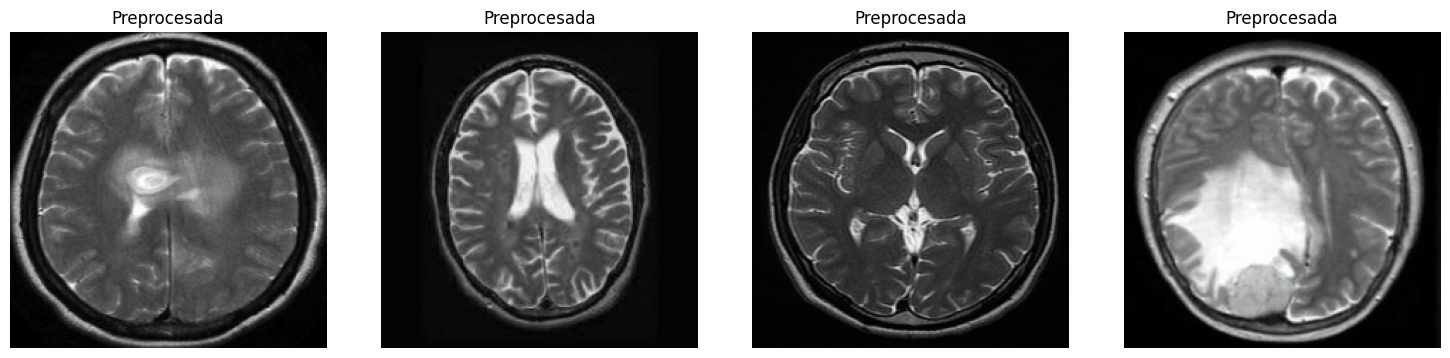

In [23]:
valid_data = normalized_img(valid_images)

 1136 de 1136 => 100%

***************************************************
                    Estadística                    
***************************************************
1136 imágenes encontradas en el directorio
Imagenes procesadas: 1136
Imagenes erróneas  : 0


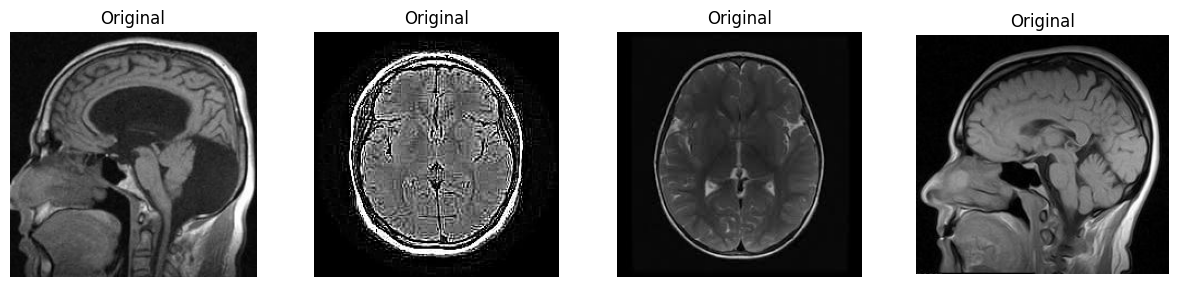

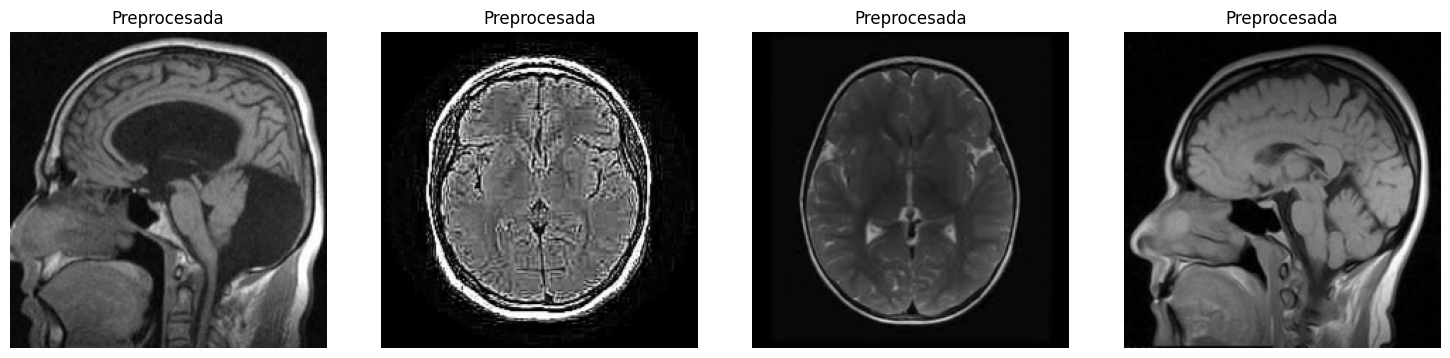

In [24]:
test_data = normalized_img(test_images)

In [25]:
# Convertir las etiquetas a formato numpy
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)
test_labels = np.array(test_labels)

In [26]:
# Data augmentation para el conjunto de entrenamiento
batch_size = 32

#Crear generadores de datos para entrenamiento y prueba
# train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# valid_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

train_generator = train_datagen.flow(train_data, train_labels, batch_size=batch_size)
valid_generator = valid_datagen.flow(valid_data, valid_labels, batch_size=batch_size)
test_generator = test_datagen.flow(test_data, test_labels, batch_size=batch_size)

# VGGNet 16

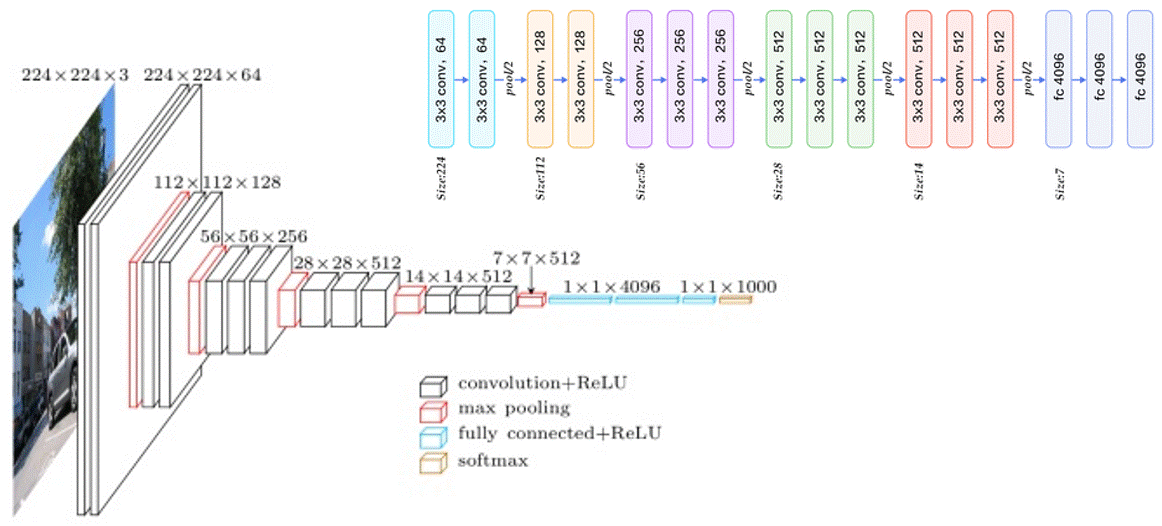



In [27]:
#!npm install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Clasificación binaria

### Modelo

In [28]:
# Cargar el modelo VGG16 sin las capas densas (fully connected)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [29]:
# Agregar nuevas capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [30]:
# Compilar el modelo
model = Model(inputs=base_model.input, outputs=predictions)

In [31]:
#Learning Rate Schedule, ajusta el valor del learning rate (tasa de aprendizaje o radio
# de aprendizaje) a medida que avanza el entrenamiento.

initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)

optimizer = Adam(learning_rate=lr_schedule)

In [32]:
#Compilar el modelo

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print("\n")
print("*****************************************************************")
print("                     ARQUITECTURA DEL MODELO                     ")
print("*****************************************************************")

model.summary()



*****************************************************************
                     ARQUITECTURA DEL MODELO                     
*****************************************************************
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                           

In [33]:
# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

### Entrenamiento

In [34]:
epochs = 100

# Entrenar el modelo
history=model.fit(train_generator, epochs=epochs, validation_data=valid_generator, callbacks=[early_stopping])

Epoch 1/100
71/71 [==============================] - 81s 783ms/step - loss: 0.6918 - accuracy: 0.5575 - val_loss: 0.6562 - val_accuracy: 0.5471
Epoch 2/100
71/71 [==============================] - 43s 609ms/step - loss: 0.5529 - accuracy: 0.7310 - val_loss: 0.3300 - val_accuracy: 0.8555
Epoch 3/100
71/71 [==============================] - 49s 691ms/step - loss: 0.3167 - accuracy: 0.8776 - val_loss: 0.5453 - val_accuracy: 0.8106
Epoch 4/100
71/71 [==============================] - 45s 626ms/step - loss: 0.2651 - accuracy: 0.8970 - val_loss: 0.1463 - val_accuracy: 0.9507
Epoch 5/100
71/71 [==============================] - 44s 619ms/step - loss: 0.1729 - accuracy: 0.9410 - val_loss: 0.1087 - val_accuracy: 0.9559
Epoch 6/100
71/71 [==============================] - 44s 623ms/step - loss: 0.1635 - accuracy: 0.9423 - val_loss: 0.1233 - val_accuracy: 0.9559
Epoch 7/100
71/71 [==============================] - 48s 681ms/step - loss: 0.1247 - accuracy: 0.9560 - val_loss: 0.0867 - val_accuracy:

In [35]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)


36/36 [==============================] - 7s 185ms/step - loss: 0.0467 - accuracy: 0.9868


In [36]:
# Obtener las métricas de entrenamiento y validación
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
stopped_epoch=range(1,len(history.history['loss'])+1)

### Métricas del modelo

#### Pérdido y exactitud

In [37]:
print("\n")
print("***************************************************")
print("                    Estadística                    ")
print("***************************************************")
print(f' Perdida : {loss*100:.2f} %')
print(f'Exactitud: {accuracy*100:.2f} %')



***************************************************
                    Estadística                    
***************************************************
 Perdida : 4.67 %
Exactitud: 98.68 %


In [38]:
import pandas as pd

# Crear un DataFrame con las métricas y pérdidas
data = {
    'Epoch': stopped_epoch,
    'Train Accuracy': train_accuracy,
    'Train Loss': train_loss,
    'Validation Accuracy': val_accuracy,
    'Validation Loss': val_loss
}
df = pd.DataFrame(data).set_index('Epoch')

df.head()




,Train Accuracy,Train Loss,Validation Accuracy,Validation Loss
Epoch,,,,
1,0.557464,0.691816,0.547137,0.656233
2,0.730956,0.552868,0.855507,0.330009
3,0.877587,0.316727,0.810573,0.545317
4,0.896962,0.265081,0.950661,0.146268
5,0.940995,0.172927,0.955947,0.108743


#### Precisión

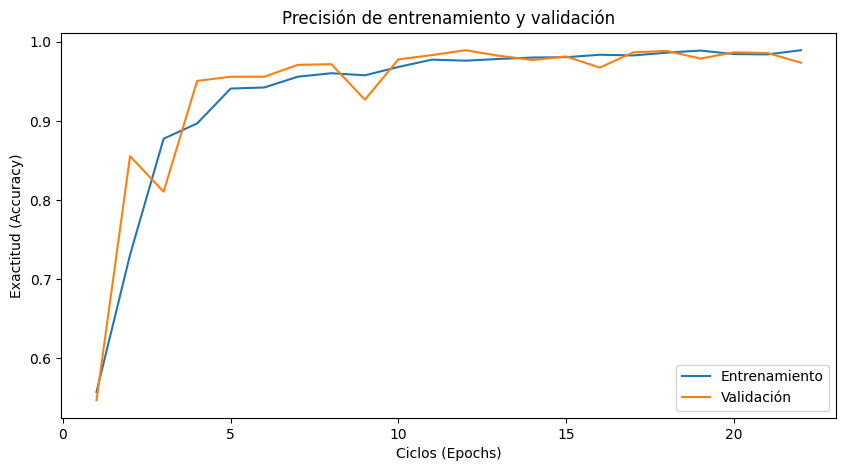

In [39]:
# Visualiza las métricas de precisión (accuracy) durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(stopped_epoch, train_accuracy, label='Entrenamiento')
plt.plot(stopped_epoch, val_accuracy, label='Validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Ciclos (Epochs)')
plt.ylabel('Exactitud (Accuracy)')
plt.legend()
plt.show()


#### Pérdida

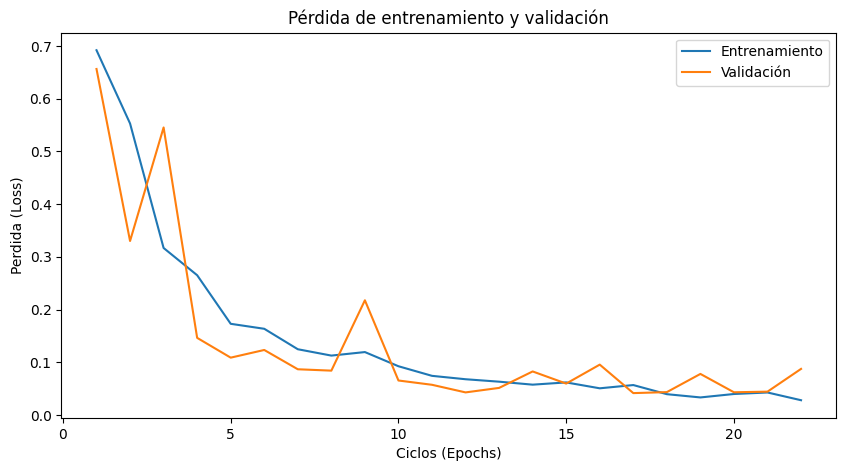

In [40]:

# Visualizar las métricas de pérdida (loss) durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(stopped_epoch, train_loss, label='Entrenamiento')
plt.plot(stopped_epoch, val_loss, label='Validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Ciclos (Epochs)')
plt.ylabel('Perdida (Loss)')
plt.legend()
plt.show()

### Evaluación del modelo (predicción)

#### Selección de datos

In [41]:
# Clasificar nuevas imágenes con el modelo entrenado

validateBrainTumorDir= repo_dir+'validate/'

# Data de clasificacion para comparar resultados
url_data =  validateBrainTumorDir + 'validate_cod.csv'
df_data = pd.read_csv(url_data, delimiter=';').set_index('file_name')
df_data['path']= [os.path.join(validateBrainTumorDir, img) for img in df_data['file']]
df_data['val']= [1 if val=='yes' else 0 for val in df_data['is_tumor']]
df_data.head()


,file,file_extension,size,is_tumor,path,val
file_name,,,,,,
1,001.jpg,jpg,12874,no,/content/drive/MyDrive/Paper_VVG_CNN/validate/...,0
2,002.jpg,jpg,"33,156",yes,/content/drive/MyDrive/Paper_VVG_CNN/validate/...,1
3,003.jpg,jpg,19102,no,/content/drive/MyDrive/Paper_VVG_CNN/validate/...,0
4,004.tif,tif,"221,676",yes,/content/drive/MyDrive/Paper_VVG_CNN/validate/...,1
5,005.jpg,jpg,36340,no,/content/drive/MyDrive/Paper_VVG_CNN/validate/...,0


#### Normalizado de imágenes

 58 de 58 => 100%

***************************************************
                    Estadística                    
***************************************************
58 imágenes encontradas en el directorio
Imagenes procesadas: 58
Imagenes erróneas  : 0


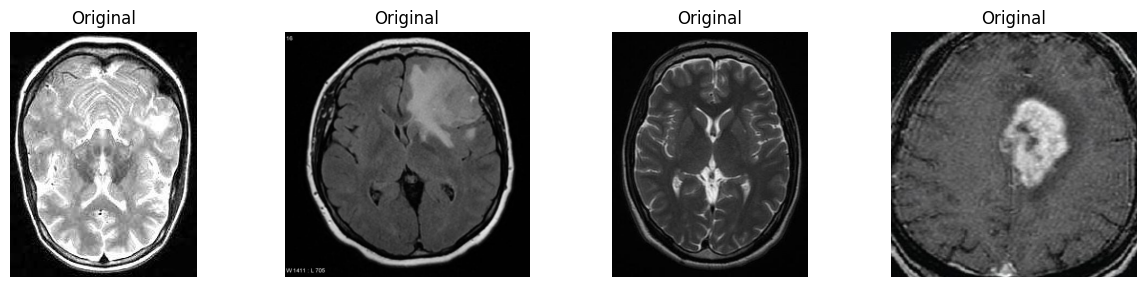

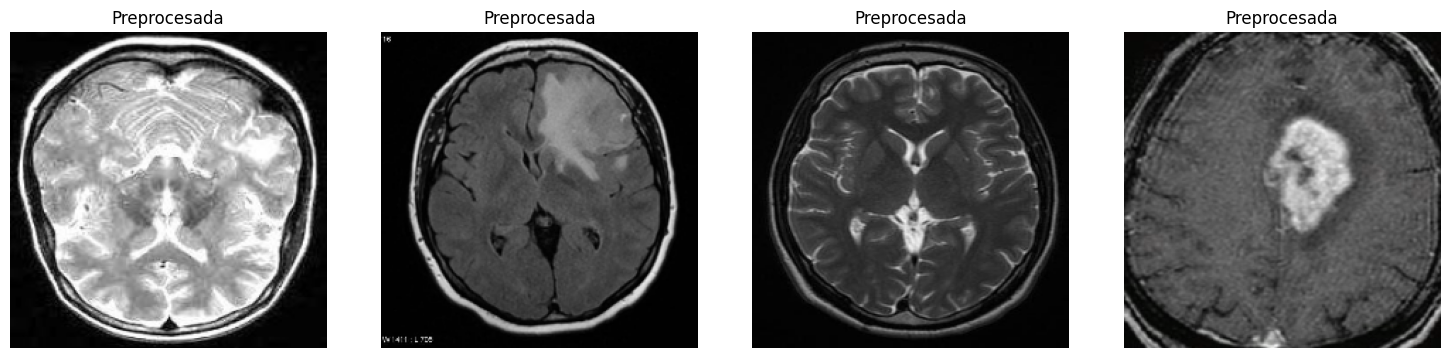

In [42]:
x_prob=normalized_img(df_data['path'])

#### Predicción

In [43]:
# Obtener las probabilidades de predicción del modelo
y_prob = model.predict(x_prob)


2/2 [==============================] - 4s 4s/step


In [44]:
y_prob_normalize =[1 if val> 0 else 0 for val in y_prob]
y_prob_normalize =np.array(y_prob_normalize )

#### Evaluación (gráfica)

##### Curva ROC

In [45]:
from sklearn.metrics import roc_curve, auc

# función para mostrar los resultados de la curva ROC y el área bajo la curva (AUC)
def mostrar_grafica_roc_curve(y_probs,y_test):
  # Calcular la curva ROC y el área bajo la curva (AUC)
  fpr, tpr, thresholds = roc_curve(y_test, y_probs)
  roc_auc = auc(fpr, tpr)
  # Graficar la curva ROC
  plt.figure(figsize=(10, 5))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')
  plt.show()

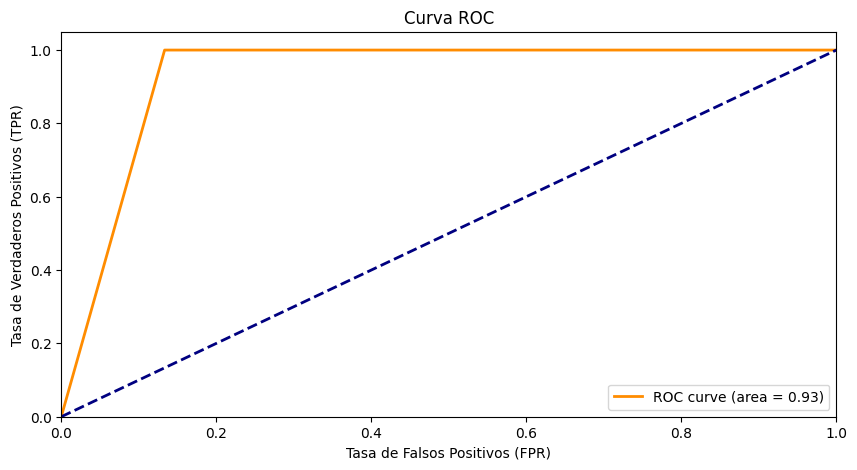

In [46]:
mostrar_grafica_roc_curve(y_prob_normalize,df_data['val'].values)